In [22]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Create a Bayesian Network object
net = BayesianNetwork()

# Define the names of the nodes
discharge = 'discharge'
cover = 'cover'
fish = 'fish'
migration = 'migration'
barriers = 'barriers'

# Add nodes to the network
net.add_node(discharge)
net.add_node(cover)
net.add_node(fish)
net.add_node(migration)
net.add_node(barriers)

# Add edges between nodes
net.add_edge(discharge, cover)

net.add_edge(barriers, migration)
net.add_edge(cover, fish)
net.add_edge(migration, fish)

# Define Conditional Probability Tables (CPTs)
cpd_cover = TabularCPD(variable=cover, variable_card=4,
                       values=[[1.0, 0.0, 0.0, 0.0],
                               [0.25, 0.50, 0.25, 0.0],
                               [0.0, 0.04, 0.01, 0.95],
                               [0.0, 0.0, 0.0, 1.0]],
                       evidence=[discharge],
                       evidence_card=[4])

cpd_migration = TabularCPD(variable=migration, variable_card=4,
                           values=[[0.95, 0.05, 0.0, 0.0],
                                   [0.50, 0.20, 0.20, 0.10],
                                   [0.25, 0.25, 0.25, 0.25],
                                   [0.0, 0.0, 0.0, 1.0]],
                           evidence=[barriers],
                           evidence_card=[4])

cpd_fish = TabularCPD(variable=fish, variable_card=4,
                      values=[
                              [1.0, 0.8, 0.6, 0.0, 0.8, 0.25, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                              [0.0, 0.2, 0.2, 0.0, 0.2, 0.5, 0.5, 0.0, 0.5, 0.5, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0],
                              [0.0, 0.0, 0.15, 0.5, 0.0, 0.25, 0.5, 0.25, 0.25, 0.5, 0.5, 0.05, 0.5, 0.25, 0.05, 0.0],
                              [0.0, 0.0, 0.05, 0.5, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.25, 0.95, 0.5, 0.75, 0.95, 1.0]],
                      evidence=[cover, migration],
                      evidence_card=[4, 4])

# Add CPDs to the network
net.add_cpds(cpd_cover, cpd_migration, cpd_fish)

In [23]:
student = BayesianNetwork([('diff', 'grades'), ('intel', 'grades')])
grades_cpd = TabularCPD('grades', 3, [[0.1,0.1,0.1,0.1,0.1,0.1],
                                      [0.1,0.1,0.1,0.1,0.1,0.1],
                                      [0.8,0.8,0.8,0.8,0.8,0.8]],
                        evidence=['diff', 'intel'], evidence_card=[2, 3])
student.add_cpds(grades_cpd)

In [24]:
# print(net.nodes())
print(net.edges(),end="\n\n\n")

for cpd in net.get_cpds():
    print(cpd)

for node in net.nodes():
    
    cpd = net.get_cpds(node)
    if cpd is not None:
        states = cpd.cardinality[0]
        print(f"Node: {node}, States: {states}")
    else:
        print(f"Node: {node}, CPD not defined")


[('discharge', 'cover'), ('cover', 'fish'), ('migration', 'fish'), ('barriers', 'migration')]


+-----------+--------------+--------------+--------------+--------------+
| discharge | discharge(0) | discharge(1) | discharge(2) | discharge(3) |
+-----------+--------------+--------------+--------------+--------------+
| cover(0)  | 1.0          | 0.0          | 0.0          | 0.0          |
+-----------+--------------+--------------+--------------+--------------+
| cover(1)  | 0.25         | 0.5          | 0.25         | 0.0          |
+-----------+--------------+--------------+--------------+--------------+
| cover(2)  | 0.0          | 0.04         | 0.01         | 0.95         |
+-----------+--------------+--------------+--------------+--------------+
| cover(3)  | 0.0          | 0.0          | 0.0          | 1.0          |
+-----------+--------------+--------------+--------------+--------------+
+--------------+-------------+-------------+-------------+-------------+
| barriers     | 

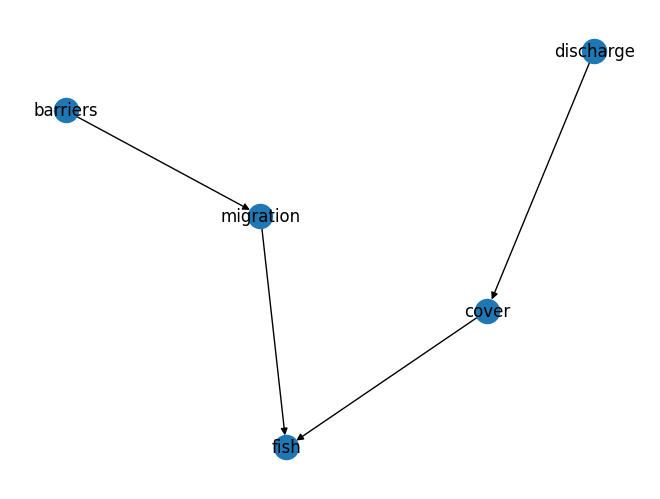

In [25]:
import networkx as nx
import pylab as plt
graph = nx.DiGraph(net.edges())

# Set node positions for better visualization
pos = nx.spring_layout(graph)

# Draw nodes, edges, and labels
nx.draw(graph, pos, with_labels=True, arrows=True)

# Show the plot
plt.show()



In [26]:
print("================================")

cpd_fish = net.get_cpds('fish')
cpd_cover = net.get_cpds('cover')

probabilities = {}

# Probability of fish migration
prob_no_barriers = cpd_fish.values[0, 0, 0]
prob_low_barriers = cpd_fish.values[0, 1, 0]
prob_medium_barriers = cpd_fish.values[0, 2, 0]
prob_high_barriers = cpd_fish.values[0, 3, 0]
probabilities['Fish Migration'] = {
    'No Barriers': prob_no_barriers,
    'Low Barriers': prob_low_barriers,
    'Medium Barriers': prob_medium_barriers,
    'High Barriers': prob_high_barriers
}

# Probability of fish being covered
prob_cover_discharge_zero = cpd_cover.values[0, 0]
prob_cover_discharge_low = cpd_cover.values[1, 0]
prob_cover_discharge_medium = cpd_cover.values[2, 0]
prob_cover_discharge_high = cpd_cover.values[3, 0]
probabilities['Fish Being Covered'] = { 
    'Discharge Zero': prob_cover_discharge_zero,
    'Discharge Low': prob_cover_discharge_low,
    'Discharge Medium': prob_cover_discharge_medium,
    'Discharge High': prob_cover_discharge_high
}

# Probability of fish wellbeing
prob_wellbeing_discharge_zero = cpd_fish.values[0, 0, :]
prob_wellbeing_discharge_low = cpd_fish.values[0, 1, :]
prob_wellbeing_discharge_medium = cpd_fish.values[0, 2, :]
prob_wellbeing_discharge_high = cpd_fish.values[0, 3, :]
probabilities['Fish Wellbeing'] = {
    'Discharge Zero': prob_wellbeing_discharge_zero,
    'Discharge Low': prob_wellbeing_discharge_low,
    'Discharge Medium': prob_wellbeing_discharge_medium,
    'Discharge High': prob_wellbeing_discharge_high
}

# Print all probabilities
for category, values in probabilities.items():
    print(category)
    for scenario, probability in values.items():
        print(f"{scenario}: {probability}")
    print()


Fish Migration
No Barriers: 1.0
Low Barriers: 0.8
Medium Barriers: 0.25
High Barriers: 0.0

Fish Being Covered
Discharge Zero: 1.0
Discharge Low: 0.25
Discharge Medium: 0.0
Discharge High: 0.0

Fish Wellbeing
Discharge Zero: [1.  0.8 0.6 0. ]
Discharge Low: [0.8  0.25 0.   0.  ]
Discharge Medium: [0.25 0.   0.   0.  ]
Discharge High: [0. 0. 0. 0.]



In the provided Netica Java code, the CPD for the "barriers" node is not explicitly defined. However, based on the structure of the network, we can infer that the "barriers" node is a parent of the "migration" node, and the "migration" node has the following CPD:

migration | barriers |   none    |   some    |   many    | huge_dam
---------------------------------------------------------------
  zero    |   none    |   0.95    |   0.05    |   0.00    |   0.00
  zero    |   some    |   0.50    |   0.20    |   0.20    |   0.10
  zero    |   many    |   0.25    |   0.25    |   0.25    |   0.25
  zero    | huge_dam  |   0.00    |   0.00    |   0.00    |   1.00
  low     |   none    |   0.95    |   0.05    |   0.00    |   0.00
  low     |   some    |   0.50    |   0.20    |   0.20    |   0.10
  low     |   many    |   0.25    |   0.25    |   0.25    |   0.25
  low     | huge_dam  |   0.00    |   0.00    |   0.00    |   1.00
  medium  |   none    |   0.95    |   0.05    |   0.00    |   0.00
  medium  |   some    |   0.50    |   0.20    |   0.20    |   0.10
  medium  |   many    |   0.25    |   0.25    |   0.25    |   0.25
  medium  | huge_dam  |   0.00    |   0.00    |   0.00    |   1.00
  high    |   none    |   0.95    |   0.05    |   0.00    |   0.00
  high    |   some    |   0.50    |   0.20    |   0.20    |   0.10
  high    |   many    |   0.25    |   0.25    |   0.25    |   0.25
  high    | huge_dam  |   0.00    |   0.00    |   0.00    |   1.00

migration | barriers |   none    |   some    |   many    | huge_dam
---------------------------------------------------------------
  zero    |   none    |   0.95    |   0.05    |   0.00    |   0.00
  low     |   none    |   0.95    |   0.05    |   0.00    |   0.00
  medium  |   none    |   0.95    |   0.05    |   0.00    |   0.00
  high    |   none    |   0.95    |   0.05    |   0.00    |   0.00
To get the probability of the "migration" node having the state "zero" when there are "no barriers," you need to look at the row where the "barriers" node is "none" and the "migration" node is "zero." In this case, the probability is 0.95.

Similarly, the probabilities for the other states of the "migration" node when there are "no barriers" can be found in the same row of the CPD table:

P(migration = low | barriers = none) = 0.05
P(migration = medium | barriers = none) = 0.00
P(migration = high | barriers = none) = 0.00
Keep in mind that these probabilities are based on the CPD defined in your provided Netica Java code.